### Build and train a basic CNN (with max 3 hidden layers)

You can use Tensorflow, Pytorch or Keras as a deep learning framework. Decide your CNN architecture:
- How many input neurons are there? - What activation function will you choose? 
- What is the number of hidden layers? (1, 2 or 3?)
- What is the kernel size, number of filters, strides, paddings, etc? 
- What activation function is used for the hidden and output layer?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras

#### Load, and preprocess the data

In [2]:
## using kearas api to call the fashion mnist data

df = tf.keras.datasets.fashion_mnist

In [3]:

(X_train, y_train), (X_test, y_test) = df.load_data()

In [4]:
print("Type of the X_train data: ", type(X_train) )
print("Type of the y_train data: ", type(y_train) )

Type of the X_train data:  <class 'numpy.ndarray'>
Type of the y_train data:  <class 'numpy.ndarray'>


In [5]:
print("Shape of the X_train and y_train",X_train.shape, y_train.shape)
print("Shape of the X_test and y_test",X_test.shape, y_test.shape)

Shape of the X_train and y_train (60000, 28, 28) (60000,)
Shape of the X_test and y_test (10000, 28, 28) (10000,)


##### Now reshape the data in useable format and normalize it by dividing 255

In [6]:
X_train=X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


In [7]:
X_train=X_train / 255
X_test=X_test/255

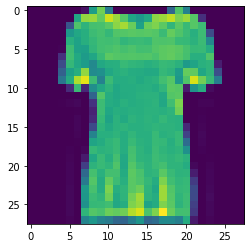

In [8]:
plt.figure()
plt.imshow(X_train[10])

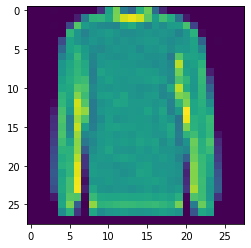

In [9]:
plt.figure()
plt.imshow(X_train[45])

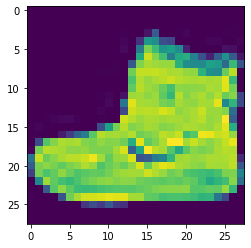

In [10]:
plt.figure()
plt.imshow(X_train[0])

In [29]:
filter_size = 28
kernal_size_num = 5
input_size = (28,28,1)
strides_size = 1
padding_size = "same"
activation_layer = "relu"

In [30]:
model = keras.Sequential([
    

    # Adding 1st layer of 32 with kernel size of 3x3 keeping the padding 0 and activation function is relu
    keras.layers.Conv2D(filters=32, 
                    kernel_size=(3, 3),
                    padding= padding_size ,
                    activation='relu',
                    kernel_initializer = 'he_normal',
                    input_shape=input_size),
    # adding Maxpooling for 1st layer
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # 2nd Conv layer 64 with kernel size of 3x3 keeping the padding 0 and activation function is relu
    keras.layers.Conv2D(filters=64, 
                    kernel_size=(3, 3),
                    padding= padding_size, 
                    activation='relu',
                    kernel_initializer = 'he_normal'),
    # adding Maxpooling for 2nd layer
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Adding Dropout to layers to avoid overfitting
    keras.layers.Dropout(0.3),

    ## flating the input array shape
    keras.layers.Flatten(input_shape=(28,28)),
    ## adding 1 dense layer of size 128
    keras.layers.Dense(128, activation=tf.nn.relu),
    ## adding 2 dense layer of size 64
    keras.layers.Dense(64, activation=tf.nn.softmax)
])
model.summary() 

# Gradient Clipping
optimizer_val = tf.keras.optimizers.Adam(lr = 0.001,beta_1 = 0.9,beta_2=0.999,clipnorm = 1.0)

# Compile the model
model.compile(optimizer=optimizer_val,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## adding earlier stopping layer
early_stopping_layer = keras.callbacks.EarlyStopping(patience=15)

# fitting the complied model and checking accuracy of the model
b_size = 32
e_size =20

model_val =model.fit(X_train, y_train,
                    batch_size=b_size,
                    epochs=e_size,
                    callbacks=[early_stopping_layer],
                    validation_data=(X_test, y_test))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 7, 7, 64)          0         
                                                                 
 flatten_11 (Flatten)        (None, 3136)            

In [31]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss:", test_loss * 100)
print("Mtest accuracy:", test_acc * 100)

313/313 [==============================] - 2s 6ms/step - loss: 0.3420 - accuracy: 0.9244
test loss: 34.20157432556152
Mtest accuracy: 92.43999719619751


In [14]:
model_val.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

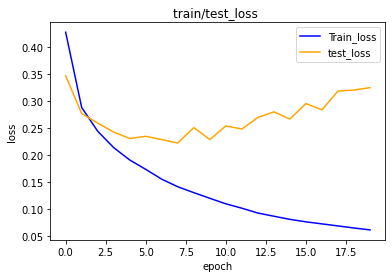

In [15]:
plt.plot(model_val.history['loss'], 'blue')
plt.plot(model_val.history['val_loss'], 'orange')
plt.title('train/test_loss ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train_loss', 'test_loss'], loc='upper right')

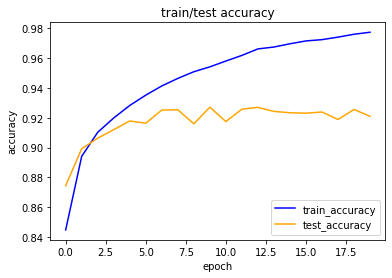

In [16]:
plt.plot(model_val.history['accuracy'], 'blue')
plt.plot(model_val.history['val_accuracy'], 'orange')
plt.title('train/test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'test_accuracy'], loc='lower right')

Part 4

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 3, 3, 64)       

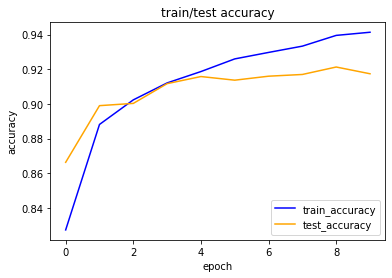

In [26]:
## Changing dropout value
# droupout_val = 0.2
droupout_val = 0.25
# droupout_val = 0.3

## Changing activation function
activation_val = "relu"
# activation_val = "softmax"
# activation_val = "sigmoid"

model = keras.Sequential([
    
    # Adding 1st layer of 32 with kernel size of 3x3 keeping the padding 0 and activation function is relu
    keras.layers.Conv2D(filters=32, 
                    kernel_size=(3, 3),
                    padding='same',
                    activation=activation_val,
                    kernel_initializer = 'he_normal',
                    input_shape=(28, 28, 1)),
    # adding Maxpooling for 1st layer
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # 2nd Conv layer 64 with kernel size of 3x3 keeping the padding 0 and activation function is relu
    keras.layers.Conv2D(filters=64, 
                    kernel_size=(3, 3),
                    padding='same', 
                    activation=activation_val,
                    kernel_initializer = 'he_normal'),
    # adding Maxpooling for 2 layer
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # 3rd Conv layer 64 with kernel size of 3x3 keeping the padding 0 and activation function is relu
    keras.layers.Conv2D(filters=64, 
                    kernel_size=(3, 3),
                    padding='same', 
                    activation=activation_val,
                    kernel_initializer = 'he_normal'),
    # adding Maxpooling for 3 layer
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Adding Dropout to layers to avoid overfitting
    keras.layers.Dropout(droupout_val),
    ## flating the input array shape
    keras.layers.Flatten(input_shape=(28,28)),
    ## adding 1 dense layer of size 256
    keras.layers.Dense(256, activation=tf.nn.relu),
    ## adding 2 dense layer of size 128
    keras.layers.Dense(128, activation=tf.nn.relu),
    ## adding 3 dense layer of size 10
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary() 

# Gradient Clipping

# optimizer_val = tf.keras.optimizers.SGD(lr = 0.01,clipnorm = 1.0)
optimizer_val = tf.keras.optimizers.Adam(lr = 0.001,beta_1 = 0.9,beta_2=0.999,clipnorm = 1.0)
# optimizer_val =  tf.keras.optimizers.RMSprop(lr = 0.001,rho = 0.90,clipnorm = 1.0)

# Step 2 - Compile the model
model.compile(optimizer=optimizer_val,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
## earlystopping
early_stopping_layer = keras.callbacks.EarlyStopping(patience=5)

model_val =model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=10,
                    callbacks=[early_stopping_layer],
                    
                    validation_data=(X_test, y_test))

## plot for train and test accuracy
plt.plot(model_val.history['accuracy'], 'blue')
plt.plot(model_val.history['val_accuracy'], 'orange')
plt.title('train/test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'test_accuracy'], loc='lower right')